In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## EDA

In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

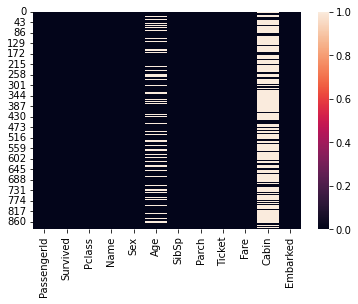

In [10]:
sns.heatmap(df.isnull())

Observation: There are a lot 687 null values in Cabin column and 177 null values in Age column.

In [9]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Number of Survivors

<AxesSubplot:xlabel='Survived', ylabel='count'>

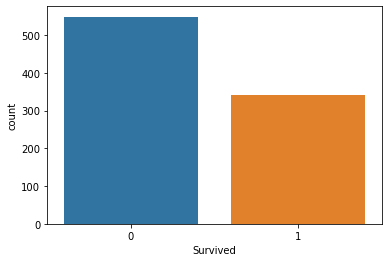

In [6]:
sns.countplot(df['Survived'])

Observation: More than 60% of the passengers did not survive.

In [8]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Observation: 62% of the passengers died and 38% survived.

### Pclass

Pclass or passenger class represents the traveling class of the commuters.

In [13]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

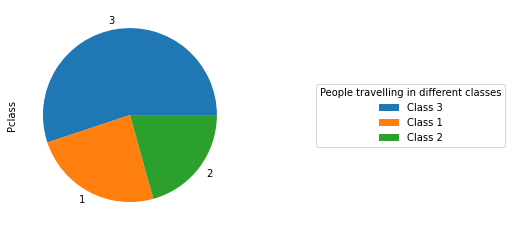

In [12]:
df.Pclass.value_counts().plot.pie().legend(labels=["Class 3","Class 1","Class 2"], loc='center right', bbox_to_anchor=(2.25, 0.5)).set_title("People travelling in different classes")


Observation: 24% of the passengers were in Class 1, 21% in Class 2, and 55% in Class 3, 

Text(0.5, 1.0, 'Percentage of people survived on the basis of class')

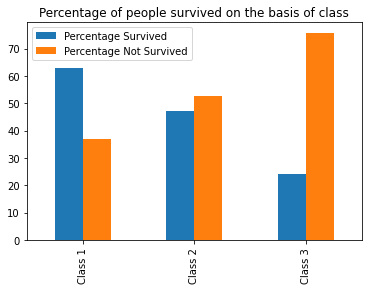

In [14]:
pclass_1_survivor_distribution = round((df[df.Pclass == 1].Survived == 1).value_counts()[1]/len(df[df.Pclass == 1]) * 100, 2)
pclass_2_survivor_distribution = round((df[df.Pclass == 2].Survived == 1).value_counts()[1]/len(df[df.Pclass == 2]) * 100, 2)
pclass_3_survivor_distribution = round((df[df.Pclass == 3].Survived == 1).value_counts()[1]/len(df[df.Pclass == 3]) * 100, 2)
pclass_perc_df = pd.DataFrame(
    { "Percentage Survived":{"Class 1": pclass_1_survivor_distribution,"Class 2": pclass_2_survivor_distribution, "Class 3": pclass_3_survivor_distribution},  
     "Percentage Not Survived":{"Class 1": 100-pclass_1_survivor_distribution,"Class 2": 100-pclass_2_survivor_distribution, "Class 3": 100-pclass_3_survivor_distribution}})
pclass_perc_df.plot.bar().set_title("Percentage of people survived on the basis of class")

Observation: 63% of the people in class 1 survived, 48% of the people in class 2 survived and only 24% people of the people in class 3 survived.

In [19]:
pclass_perc_df

,Percentage Survived,Percentage Not Survived
Class 1,62.96,37.04
Class 2,47.28,52.72
Class 3,24.24,75.76


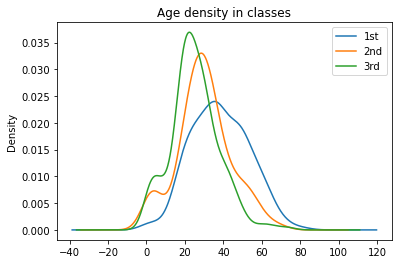

In [15]:
for x in [1,2,3]:    ## for 3 classes
    df.Age[df.Pclass == x].plot(kind="kde")
plt.title("Age density in classes")
plt.legend(("1st","2nd","3rd"))

Observation: Majority of Class 1 passengers were in their 40's, majority of Class 2 passengers were in their 30's and majority of Class 3 passengers were in their 20's.

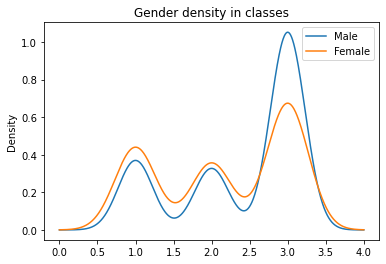

In [18]:
for x in ["male","female"]:
    df.Pclass[df.Sex == x].plot(kind="kde")
plt.title("Gender density in classes")
plt.legend(("Male","Female"))

Observation: There are more women than men in Class 1 and 2 but there are significantly more men than women in Class 3.

### Sex

<AxesSubplot:>

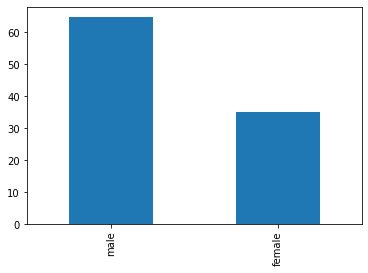

In [21]:
fig_sex = (df.Sex.value_counts(normalize = True) * 100).plot.bar()
male_pr = round((df[df.Sex == 'male'].Survived == 1).value_counts()[1]/len(df.Sex) * 100, 2)
female_pr = round((df[df.Sex == 'female'].Survived == 1).value_counts()[1]/len(df.Sex) * 100, 2)
sex_perc_df = pd.DataFrame(
    { "Percentage Survived":{"male": male_pr,"female": female_pr},  "Percentage Not Survived":{"male": 100-male_pr,"female": 100-female_pr}})
fig_sex

Roughly around 65% of the passengers were male while the remaining 35% were female.

Text(0.5, 1.0, 'Percentage of male and female survived and Deceased')

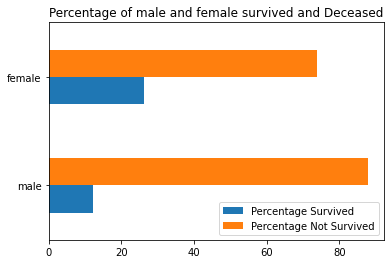

In [22]:
sex_perc_df.plot.barh().set_title("Percentage of male and female survived and Deceased")

Observation: The percentage of female survivors was higher than the number of male survivors.

### Age

In [24]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Observation: The youngest passenger was 2 months old and the oldest passenger was 80 years old.

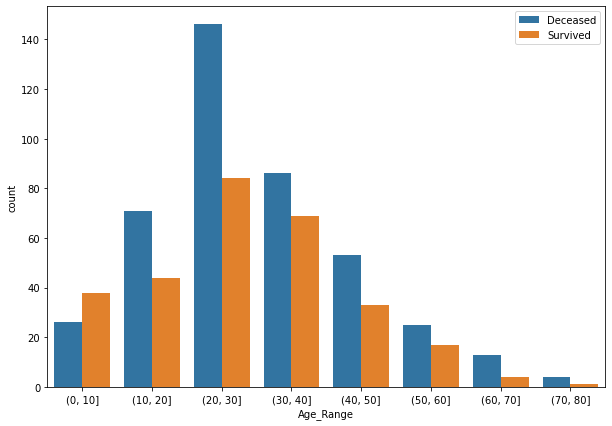

In [29]:
df['Age_Range'] = pd.cut(df.Age, [0, 10, 20, 30, 40, 50, 60,70,80])
plt.figure(figsize=(10,7))
sns.countplot(x = "Age_Range", hue = "Survived", data = df).legend(labels = ["Deceased", "Survived"])

Observation: Only in the age group 0-10 there are more survivors than deceased, in every other age group, there are more deceased passengers than survivors.

<AxesSubplot:xlabel='Age', ylabel='Density'>

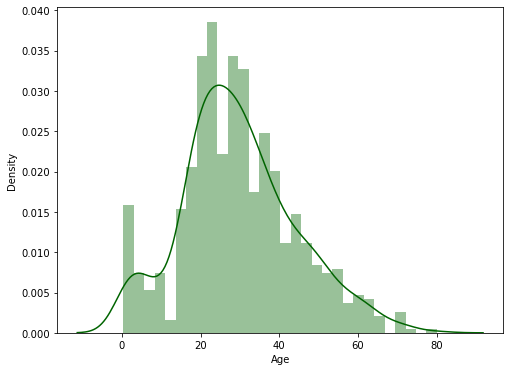

In [32]:
plt.figure(figsize=(8,6))
sns.distplot(df['Age'].dropna(),color='darkgreen',bins=30)

Most passengers were in the age group 20-40.

### SibSp

SibSp is the number of siblings or spouse of a person onboard.

In [33]:
df.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

The maximum number of relatives someone travelled with is 8.

Text(0.5, 1.0, 'Number of siblings or spouses vs survival count')

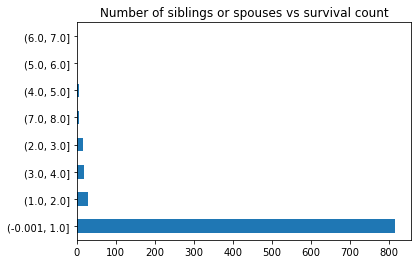

In [35]:
ss = pd.DataFrame()
ss['survived'] = df.Survived
ss['sibling_spouse'] = pd.cut(df.SibSp, [0, 1, 2, 3, 4, 5, 6,7,8], include_lowest = True)
(ss.sibling_spouse.value_counts()).plot.barh().set_title("Number of siblings or spouses vs survival count")

Observation: the higher the number of siblings/spouse with someone, the lower the rate of survival.

Most people who survived either travelled alone or with 1 sibling/spouse.

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 [Text(-1.0, 0, '(6.0, 7.0]'),
  Text(0.0, 0, '(-0.001, 1.0]'),
  Text(1.0, 0, '(1.0, 2.0]'),
  Text(2.0, 0, '(3.0, 4.0]'),
  Text(3.0, 0, '(2.0, 3.0]'),
  Text(4.0, 0, '(7.0, 8.0]'),
  Text(5.0, 0, '(4.0, 5.0]'),
  Text(6.0, 0, '(5.0, 6.0]'),
  Text(7.0, 0, '(6.0, 7.0]'),
  Text(8.0, 0, '')])

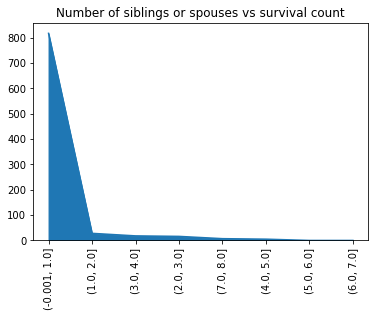

In [39]:
(ss.sibling_spouse.value_counts()).plot.area().set_title("Number of siblings or spouses vs survival count")
plt.xticks(rotation=90)

Observation: the higher the number of siblings/spouse with someone, the lower the rate of survival.

Most people who survived either travelled alone or with 1 sibling/spouse.

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '(-0.001, 1.0]'),
  Text(1, 0, '(1.0, 2.0]'),
  Text(2, 0, '(2.0, 3.0]'),
  Text(3, 0, '(3.0, 4.0]'),
  Text(4, 0, '(4.0, 5.0]'),
  Text(5, 0, '(5.0, 6.0]'),
  Text(6, 0, '(6.0, 7.0]'),
  Text(7, 0, '(7.0, 8.0]')])

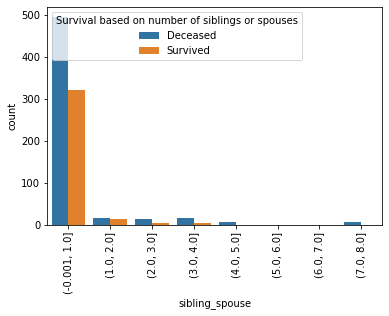

In [43]:
x = sns.countplot(x = "sibling_spouse", hue = "survived", data = ss).legend(labels = ["Deceased", "Survived"])
x.set_title("Survival based on number of siblings or spouses")
plt.xticks(rotation=90)

Observation: the higher the number of siblings/spouse with someone, the lower the rate of survival.

### Parch

The number of parents or children each passenger was traveling with.

In [44]:
df.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

The maximum number of children with a passenger was 6.

Text(0.5, 1.0, 'Number of parents/children and survival density')

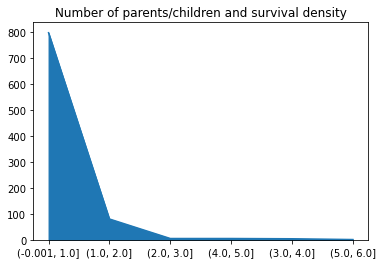

In [45]:
pc = pd.DataFrame()
pc['survived'] = df.Survived
pc['parents_children'] = pd.cut(df.Parch, [0, 1, 2, 3, 4, 5, 6], include_lowest = True)
(pc.parents_children.value_counts()).plot.area().set_title("Number of parents/children and survival density")

Observation: the higher the number of parents/children with someone, the lower the rate of survival is.

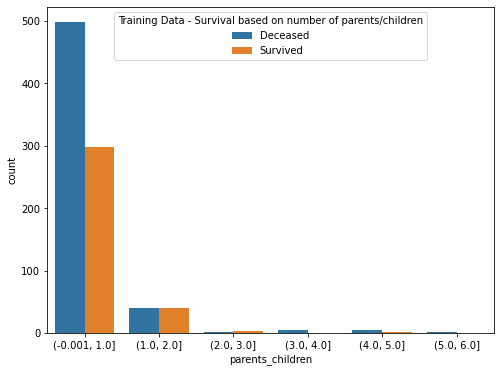

In [47]:
plt.figure(figsize=(8,6))

sns.countplot(x = "parents_children", hue = "survived", data = pc).legend(labels = ["Deceased", "Survived"]).set_title("Training Data - Survival based on number of parents/children")

Observation: passengers with 2-3 parents or children had the highest survival rate.

### Fare

In [48]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

It is clear that there is a strong correlation between the fare and the survival. The higher a passenger paid, the higher would be his chances to survive.

In [49]:
df['Fare_Category'] = pd.cut(df['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid','High_Mid','High'])

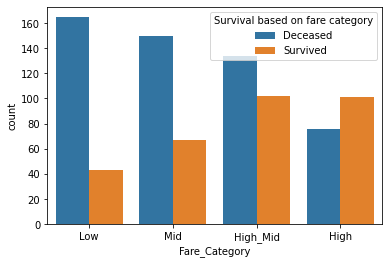

In [50]:
sns.countplot(x = "Fare_Category", hue = "Survived", data = df).legend(labels = ["Deceased", "Survived"]).set_title("Survival based on fare category")

Observation: the higher fare a passenger paid, the higher their chances of survival. Majority of passengers in low, mid and high_mid fare categories died, with the highest death percentage in low and mid.

### Embarked

Embarked signifies where the traveler boarded from. There are three possible values for Embark - Southampton,Cherbourg,Queenstown.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

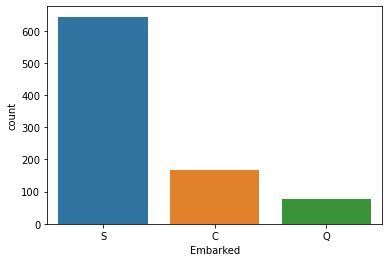

In [52]:
sns.countplot(df['Embarked'])

Observation: Most passengers embarked from Southhampton, a small number from Cherbourg and least from Queenstown.

Text(0.5, 1.0, 'Survival based on embarking point.')

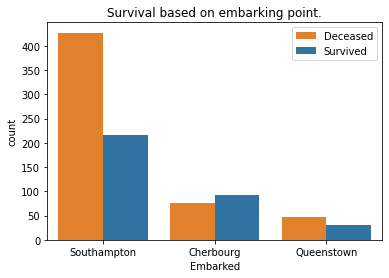

In [51]:
p = sns.countplot(x = "Embarked", hue = "Survived", data = df, palette=["C1", "C0"])
p.set_xticklabels(["Southampton","Cherbourg","Queenstown"])
p.legend(labels = ["Deceased", "Survived"])
p.set_title("Survival based on embarking point.")

Observation: There is a higher survivor percentage for the passengers who embarked at Cherbourg.

## Data Imputation

In [55]:
df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
Age_Range        177
Fare_Category     53
dtype: int64

Since there are only 2 missing values in Embarked, we will impute them with the mode,

In [3]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace = True)

Age has 177 missing values, so we will first group the data by sex and class, and then impute the missing values with the median.

In [4]:
grp = df.groupby(['Sex', 'Pclass'])  
grp

In [5]:
df.Age = grp.Age.apply(lambda x: x.fillna(x.median()))

#If still any row remains
df.Age.fillna(df.Age.median, inplace = True)

In [61]:
df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin              0
Embarked           0
Age_Range        177
Fare_Category     53
dtype: int64

## Adding features

Combining SibSp and Parch columns to make a family column and is_alone column

In [6]:
df['Family'] = df.Parch + df.SibSp
df['Is_Alone'] = df.Family == 0

In [63]:
df['Family']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Family, Length: 891, dtype: int64

In [65]:
df.Family.nunique()

9

In [64]:
df['Is_Alone']

0      False
1      False
2       True
3      False
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: Is_Alone, Length: 891, dtype: bool

## Encoding

In [67]:
df.dtypes

PassengerId         int64
Survived            int64
Pclass              int64
Name               object
Sex                object
Age               float64
SibSp               int64
Parch               int64
Ticket             object
Fare              float64
Cabin              object
Embarked           object
Age_Range        category
Fare_Category    category
Family              int64
Is_Alone             bool
dtype: object

In [7]:
oe = OrdinalEncoder()
df['Sex'] = oe.fit_transform(df['Sex'].values.reshape(-1,1).astype(str))
df['Is_Alone'] = oe.fit_transform(df['Sex'].values.reshape(-1,1).astype(bool))
df['Embarked'] = oe.fit_transform(df['Embarked'].values.reshape(-1,1).astype(str))

## Dropping columns which are not needed

In [9]:
df.drop(['PassengerId','Cabin','Name', 'Ticket','SibSp', 'Parch'], axis=1, inplace=True)

In [10]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Is_Alone
0,0,3,1.0,22.0,7.2500,2.0,1,1.0
1,1,1,0.0,38.0,71.2833,0.0,1,0.0
2,1,3,0.0,26.0,7.9250,2.0,0,0.0
3,1,1,0.0,35.0,53.1000,2.0,1,0.0
4,0,3,1.0,35.0,8.0500,2.0,0,1.0
...,...,...,...,...,...,...,...,...
886,0,2,1.0,27.0,13.0000,2.0,0,1.0
887,1,1,0.0,19.0,30.0000,2.0,0,0.0
888,0,3,0.0,21.5,23.4500,2.0,3,0.0
889,1,1,1.0,26.0,30.0000,0.0,0,1.0


## Correlation and checking multicollinearity with VIF Factor

<AxesSubplot:>

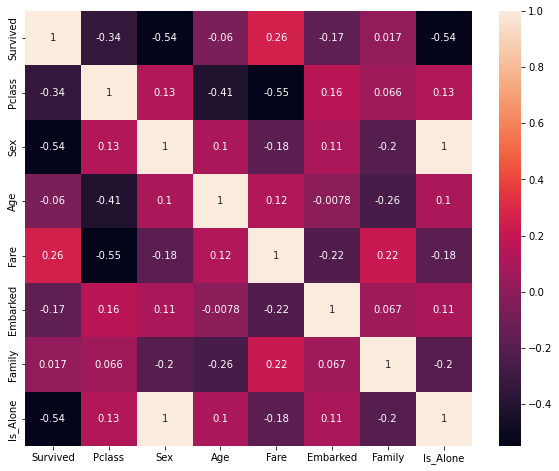

In [73]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

There is negative correlation between is_alone and survival. There is also negative correlation between fare and pclass. There is positive correlation between fare and survival. Overall, there is no high value of correlation.

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif = pd.DataFrame()
    vif['variables'] = df[0:-1].columns
    vif['VIF FACTOR'] = [variance_inflation_factor(df[0:-1].values,i) for i in range(df[0:-1].shape[1])]
    return vif

In [76]:
vif_calc()

,variables,VIF FACTOR
0,Survived,1.961746
1,Pclass,5.876360
2,Sex,inf
3,Age,4.729200
4,Fare,1.893001
5,Embarked,4.804044
6,Family,1.602468
7,Is_Alone,inf


Very low amount of multicollinearity.

## Skewness

In [74]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.534083
Fare        4.787317
Embarked   -1.264823
Family      2.727441
Is_Alone   -0.618921
dtype: float64

There is high skewness in fare but it is because some passengers paid no fare and some paid very high fare. We will remove the skewness in Fare.

In [11]:
df['Fare'] = np.sqrt(df['Fare'])

In [12]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.534083
Fare        2.085004
Embarked   -1.264823
Family      2.727441
Is_Alone   -0.618921
dtype: float64

## Splitting data for training and testing

In [13]:
x = df.iloc[:,1:]
x

,Pclass,Sex,Age,Fare,Embarked,Family,Is_Alone
0,3,1.0,22.0,2.692582,2.0,1,1.0
1,1,0.0,38.0,8.442944,0.0,1,0.0
2,3,0.0,26.0,2.815138,2.0,0,0.0
3,1,0.0,35.0,7.286975,2.0,1,0.0
4,3,1.0,35.0,2.837252,2.0,0,1.0
...,...,...,...,...,...,...,...
886,2,1.0,27.0,3.605551,2.0,0,1.0
887,1,0.0,19.0,5.477226,2.0,0,0.0
888,3,0.0,21.5,4.842520,2.0,3,0.0
889,1,1.0,26.0,5.477226,0.0,0,1.0


In [14]:
y = df.iloc[:,0]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Models

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
lr = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC(kernel='linear')
dtc = DecisionTreeClassifier()
gnb = GaussianNB()
rf = RandomForestClassifier()
models = [lr,knn,svc,dtc,gnb,rf]

### Finding best random state

In [16]:
best_random_state = 0
best_score = 0
for i in range(100):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2, random_state=i)
    lr.fit(xtrain,ytrain)
    pred = lr.predict(xtest)
    score = accuracy_score(ytest, pred)
    print(f'At random score {i}, accuracy score is {score}')
    if score > best_score:
        best_score = score
        best_random_state = i
print(f'Best score is {best_score} at random state {best_random_state}')

At random score 0, accuracy score is 0.8156424581005587
At random score 1, accuracy score is 0.8044692737430168
At random score 2, accuracy score is 0.7877094972067039
At random score 3, accuracy score is 0.770949720670391
At random score 4, accuracy score is 0.8268156424581006
At random score 5, accuracy score is 0.8324022346368715
At random score 6, accuracy score is 0.8603351955307262
At random score 7, accuracy score is 0.7653631284916201
At random score 8, accuracy score is 0.7597765363128491
At random score 9, accuracy score is 0.7653631284916201
At random score 10, accuracy score is 0.8268156424581006
At random score 11, accuracy score is 0.88268156424581
At random score 12, accuracy score is 0.7988826815642458
At random score 13, accuracy score is 0.8491620111731844
At random score 14, accuracy score is 0.7988826815642458
At random score 15, accuracy score is 0.8212290502793296
At random score 16, accuracy score is 0.7541899441340782
At random score 17, accuracy score is 0.7821

#### best random state is 11.

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2, random_state=11)

In [18]:
for i in models:
    i.fit(xtrain,ytrain)
    training_score = cross_val_score(i, xtrain, ytrain, cv=5)
    print(f'Model {i} had training score of {training_score.mean()*100}%')

Model LogisticRegression() had training score of 78.36993991923569%
Model KNeighborsClassifier() had training score of 76.12429823697428%
Model SVC(kernel='linear') had training score of 77.53077908007485%
Model DecisionTreeClassifier() had training score of 77.25105880035457%
Model GaussianNB() had training score of 77.38697921796513%
Model RandomForestClassifier() had training score of 80.19797104304146%


#### Random forest had best cross val score so we will proceed with that.

In [19]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [20]:
grid = GridSearchCV(rf, param_grid, cv=10, verbose=1, n_jobs=-1)

In [21]:
grid.fit(xtrain,ytrain)
grid.best_params_

Fitting 10 folds for each of 60 candidates, totalling 600 fits


{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [22]:
rf = RandomForestClassifier(criterion='entropy', max_depth=6, max_features='sqrt', n_estimators = 500)

In [23]:
cross_val_score(rf, xtrain,ytrain,cv=5)

array([0.8041958 , 0.83216783, 0.83802817, 0.86619718, 0.78873239])

In [24]:
rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
print(f'The accuracy score of this model is: {accuracy_score(ytest, pred) * 100}%')
print(confusion_matrix(ytest, pred))
print(classification_report(ytest, pred))

The accuracy score of this model is: 86.59217877094973%
[[112   6]
 [ 18  43]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       118
           1       0.88      0.70      0.78        61

    accuracy                           0.87       179
   macro avg       0.87      0.83      0.84       179
weighted avg       0.87      0.87      0.86       179



## Conclusion: Random Forest model gives the best results with 86% accuracy score.

## Saving best model

In [105]:
import pickle
filename = 'titanic.pkl'
pickle.dump(rf, open(filename, 'wb'))

loading it back and checking accuracy:

In [106]:
model = pickle.load(open('titanic.pkl', 'rb'))
model.fit(xtrain, ytrain)
pred = model.predict(xtest)
accuracy_score(ytest,pred)*100

87.70949720670392